# Car Sales Analysis

### Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### Loading the data

In [2]:
raw_data = pd.read_csv('car_sales.csv')
raw_data.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


## Preprocessing - Cleaning Data

### Exploring the descriptive statistics of the variables

In [4]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determinig the variables of interest

In [5]:
data = raw_data.drop(['Model'], axis = 1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
data_no_mv = data.dropna(axis=0)

In [8]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# Exploring the Probability Distribution Functions of each feature

## Price

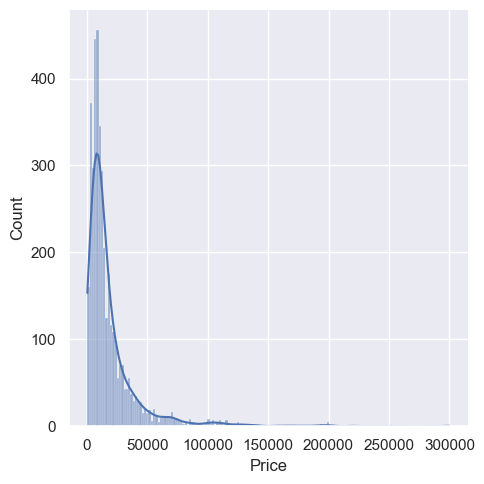

In [9]:
sns.displot(data_no_mv['Price'],kde='True')
#problems at the high end

### Dealing with the outliers. 
The data points which would affect the regression dramatically.

In [10]:
q = data_no_mv['Price'].quantile(0.99)
data_q1 = data_no_mv[data_no_mv['Price']<q]
data_q1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


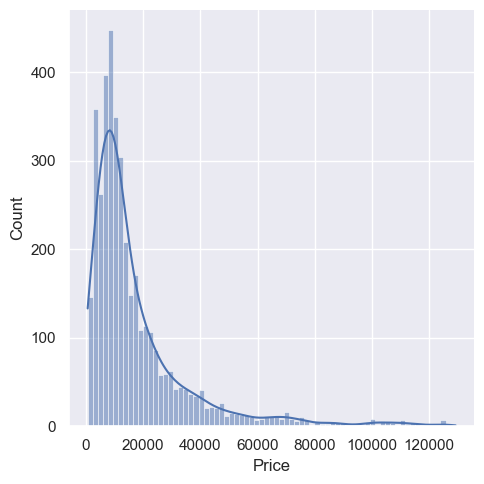

In [11]:
sns.displot(data_q1['Price'],kde='True')
#Less outliers in the distribution

## Mileage

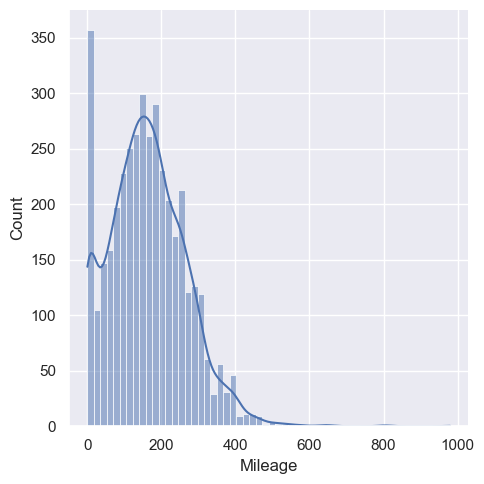

In [12]:
sns.displot(data_no_mv['Mileage'], kde='True')

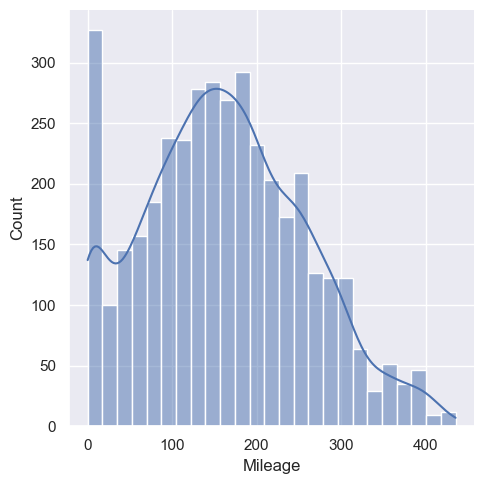

In [13]:
q = data_q1['Mileage'].quantile(0.99)
data_q2 = data_q1[data_q1['Mileage']<q]
sns.displot(data_q2['Mileage'], kde='True')

## Engine Volume

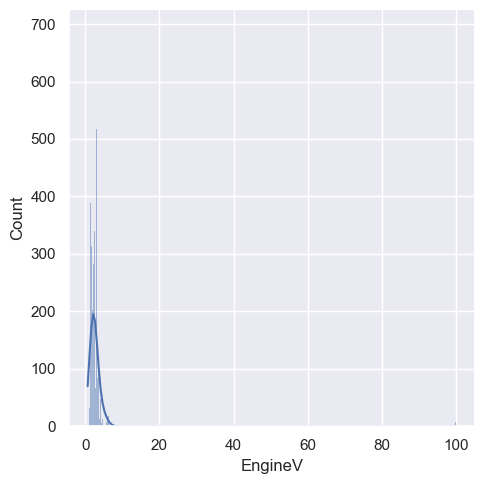

In [14]:
sns.displot(data_no_mv['EngineV'], kde='True')
#Incorrect entries of Engine Volumes exist in the data

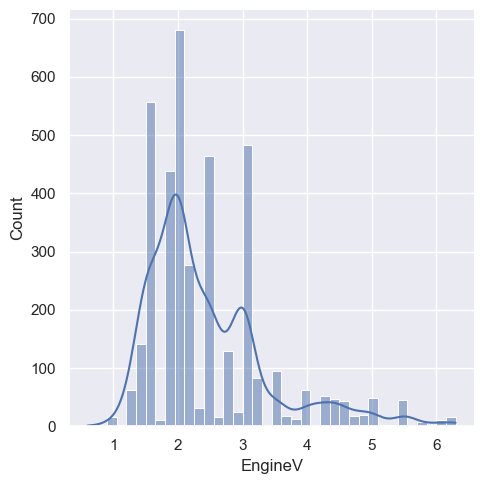

In [15]:
data_q3 = data_q2[data_q2['EngineV']<6.5]
sns.displot(data_q3['EngineV'], kde='True')

## Year

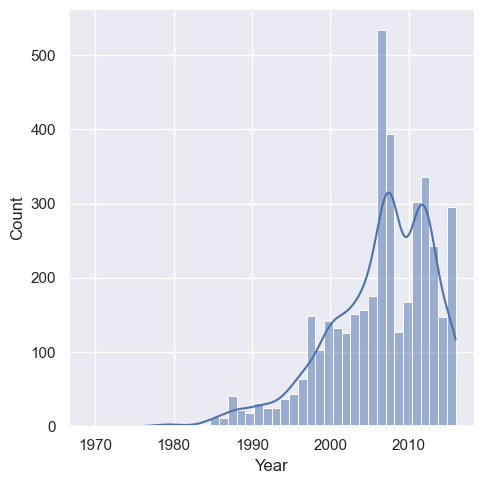

In [16]:
sns.displot(data_no_mv['Year'], kde='True')
#problems with low end data, most probably vintage cars

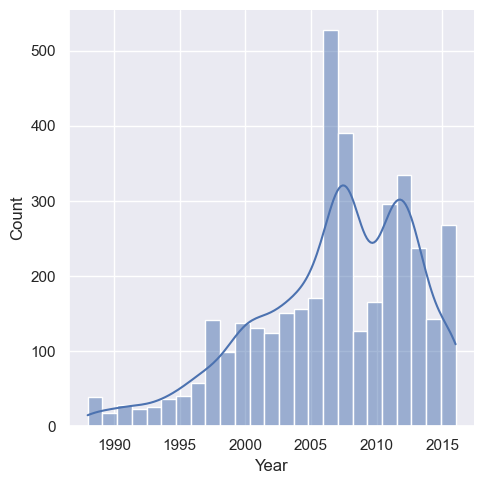

In [17]:
q = data_q3['Year'].quantile(0.01)
data_q4 = data_q3[data_q3['Year']>q]
sns.displot(data_q4['Year'], kde='True')

## Cleaned data
Indexes of raw data have been remembered. For the purpose of furthere regression the indices have to be reset. Dropping the old values.

In [18]:
data_cleaned = data_q4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


# Checking the Ordinary Least Squares assumptions

## Linearity

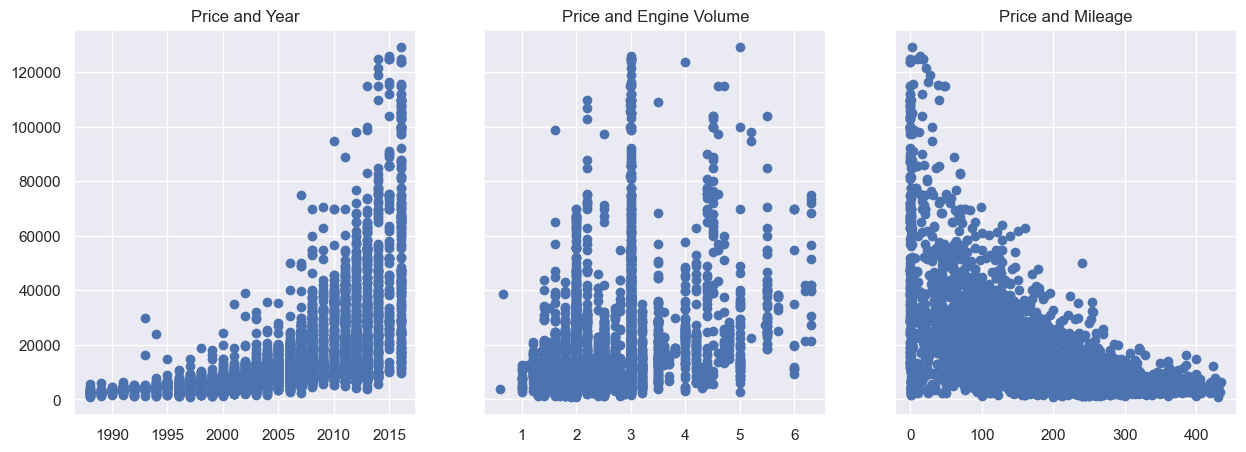

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,5))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and Engine Volume')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

There seem not to be a linear patterns. Thus, one or more variables have to be transformed. A logarythmic transformation can be employed.

### Relaxing the assumption

In [20]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


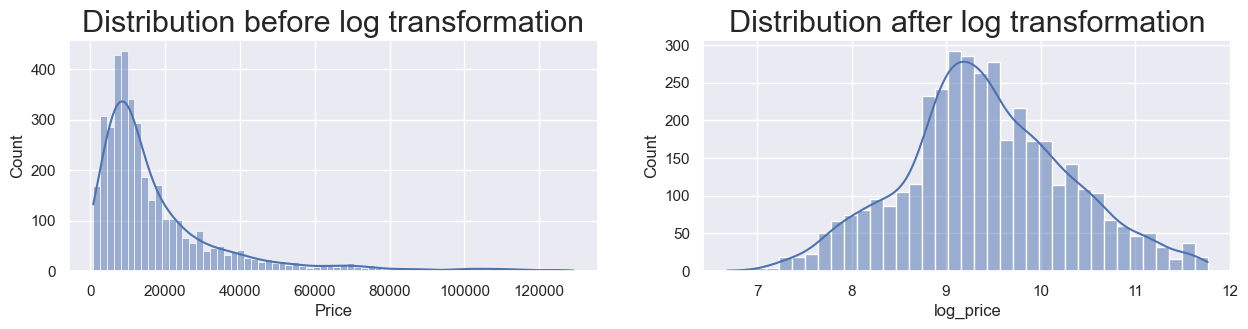

In [21]:
#Comparison of the Probability Distributions
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,3))
sns.histplot(data_cleaned['Price'], kde='True', ax=ax1)
ax1.set_title('Distribution before log transformation', fontsize=22)
sns.histplot(data_cleaned['log_price'], kde='True', ax=ax2)
ax2.set_title('Distribution after log transformation', fontsize=22)
plt.show()

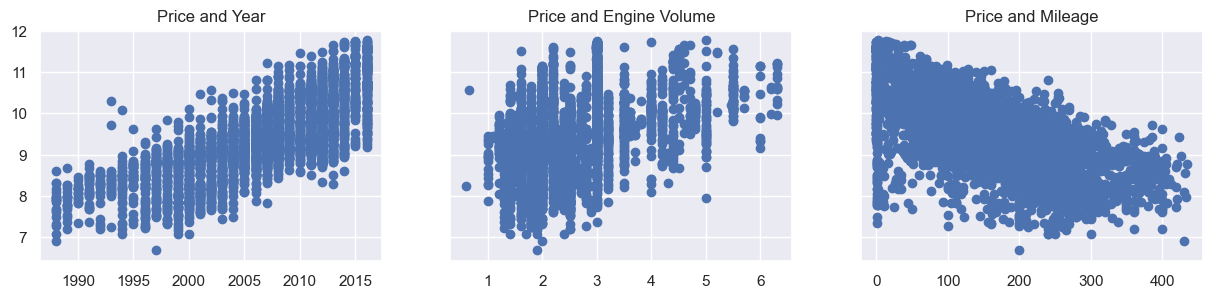

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Price and Engine Volume')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Price and Mileage')
plt.show()

In [23]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


After the logarythmic transformation of the Price variable, linear patterns are directly visible.

## Multicollinearity

In [24]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

It is logical that 'Year' and 'Mileage' might be correlated. For that reason some level of multicollinearity is expected. Sklearn does not have a dedicated method to check this assumption. However, StatsModels has one. One of the best ways to check for multicollinearity is VIF (variance inflation factor).

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


VIF of 1 means there is no collinearity at all, and it is also a minimum value of the measure. There is no direct statement what is the treshold of unacceptable correlation (above 5, 6 or 10). However any value between 1 and 5 is acceptable.


In this case Year seems to be too much correlated with other variables. Thus, it may be dropped.

We mostly shouldn't wonder when do we have multicollinearity as we usually have some. The better question is "When we can safely ignore it". [Article on this topic](http://statisticalhorizons.com/multicollinearity)

In [26]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

# Preprocess the categorical data
### Create dummy variables

In [27]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True).astype(float)

In [28]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277.0,2.0,8.342840,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,427.0,2.9,8.974618,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,358.0,5.0,9.495519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,240.0,4.2,10.043249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,120.0,2.0,9.814656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


### Check for multicollinearity with categorical features

In [29]:
variables = data_with_dummies
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,4.460434,Mileage
1,13.445639,EngineV
2,41.981260,log_price
3,2.603990,Brand_BMW
4,3.084356,Brand_Mercedes-Benz
5,1.830297,Brand_Mitsubishi
6,2.281498,Brand_Renault
7,2.406546,Brand_Toyota
8,3.312814,Brand_Volkswagen
9,1.583516,Body_hatch


### Rearange the data

In [30]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [31]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [32]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,8.974618,427.0,2.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,9.495519,358.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,10.043249,240.0,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,9.814656,120.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163.0,2.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3863,9.792556,35.0,1.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3864,11.736069,9.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3865,8.779557,1.0,3.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


# Linear Regression Model

## Declaring the inputs and the targets

In [33]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

## Scaling the data - standardization

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [35]:
#Scaled data
inputs_scaled = scaler.transform(inputs)

## Train Test Split

In [36]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(inputs_scaled, targets, test_size=0.2, random_state=365 )


## Creating the regression

In [37]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

### First check of the model quality

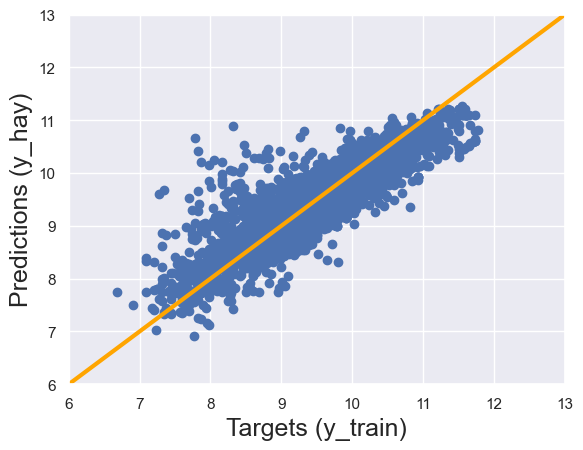

In [38]:
y_hat = reg.predict(x_train)
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_hay)', size = 18)
plt.plot([0, 13], [0, 13], color = 'orange', linewidth = 3)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Created model is definitely close to the 45 degree line (x=y). Thus, it passed the first check, but there is place for improvements. 

### Second check of the model quality - residuals

Text(0.5, 1.0, 'Residuals PDF')

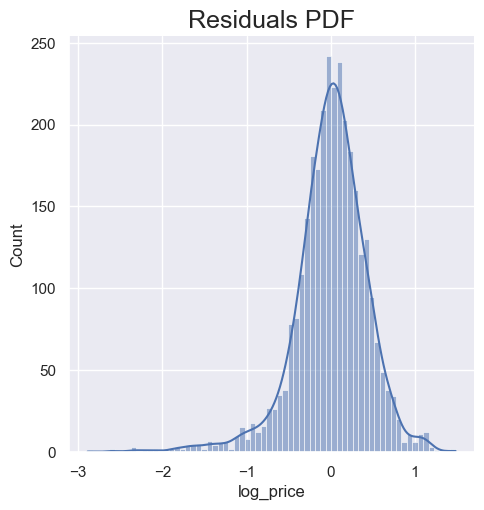

In [39]:
sns.displot(y_train - y_hat,kde = 1)
plt.title('Residuals PDF', size=18)

The residuals are the estimates of the errors. Mean seems to be 0 and they are normally distributed. However the tail is longer on the lower side. It would mean that a much higher price is predicted than is observed. Overestimation

In [40]:
#R-squared
reg.score(x_train,y_train)

0.744996578792662

## Finding the weights and bias

### Bias

In [41]:
reg.intercept_

9.415239458021299

### Weights

In [42]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [43]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In this state the model is far from interpretable, but for:

I. Continuous variables:
1. A positive weight shows that as a feature increases in values, so does the log_price and Price respectively
2. A negative weight shows that as a feature increases in values, log_price and Price decreases

II. Dummy variables:
1. A positive weight shows that the respective category (Brand) is more expensive than the benchmark (Audi in this case)
2. Similarly, a negative weight shows that the respective category (Brand) is less expensive than benchmark (Audi).

In [44]:
data_cleaned['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

# Testing

In [45]:
y_hat_test = reg.predict(x_test)

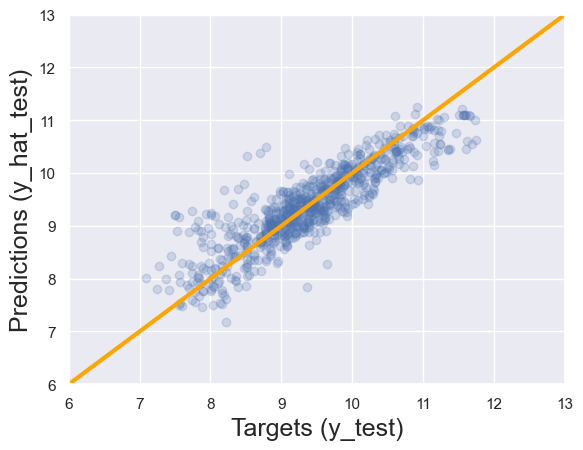

In [46]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size = 18)
plt.ylabel('Predictions (y_hat_test)', size = 18)
plt.plot([0, 13], [0, 13], color = 'orange', linewidth = 3)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [47]:
#DataFramce Performance
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction']) #np.exp had to be used to change the log to a decent number through exponential
#to check the Target values and predicted ones we need to drop indices from target df
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
#calculate the residual
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference [%]'] = np.abs((df_pf['Residual'] / df_pf['Target']) * 100)
df_pf

,Prediction,Target,Residual,Difference [%]
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


# Describing the overall performence

In [48]:
df_pf.describe()

,Prediction,Target,Residual,Difference [%]
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [51]:
pd.options.display.max_rows = 256
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by = ['Difference [%]'])

,Prediction,Target,Residual,Difference [%]
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
...,...,...,...,...
657,32481.05,6000.00,-26481.05,441.35
162,9954.42,1800.00,-8154.42,453.02
451,35956.50,6500.00,-29456.50,453.18
532,10019.90,1800.00,-8219.90,456.66
